In [1]:
from sklearn import datasets
iris= datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [5]:
x= iris['data'][:,3:] # 꽃잎의 너비변수만 사용, 3:하면 shape를 2차원형태로 만들어줌.
y=(iris['target']==2).astype('int') # index=2 : virginica. virginica가 아니면 다 0이 뜸

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

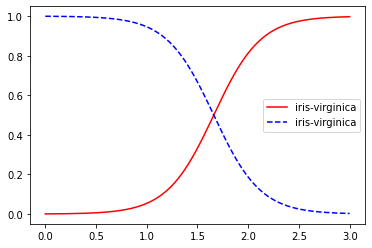

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_new = np.linspace(0,3,1000).reshape(-1,1) # linspace는 0부터 3까지 사이의 1000개의 숫자 생성, reshape(-1,정수)의 의미는 정수 부여하는거에 따라 행은 자동으로 계산되는 것 뜻함.
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new,y_proba[:,1], 'r-',label='iris-virginica')
plt.plot(x_new,y_proba[:,0], 'b--',label='iris-virginica')
plt.legend() # 그래프 안에 네모 박스 나타내주는거.
plt.show()

In [17]:
# softmax 실습
x=iris['data'][:,(2,3)] # 길이, 너비변수 사용
y= iris['target'] # 3개 모든 클래스 사용

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10,random_state=2021)
# multinomial로 소프트맥스 회귀 사용, lbfgs는 ?머신러닝에서 많이 사용, C는 L2규제화를 뜻함(릿지회귀), random_state는 사람들과 동일한 모델로 만들 수 있다.
softmax_reg.fit(x,y)

LogisticRegression(C=10, multi_class='multinomial', random_state=2022)

In [21]:
new_iris =[[5,2]] # 길이 5 너비 2
prediction = softmax_reg.predict(new_iris)[0] # predict는 가장 높은 idex, predict_proba는 모든 확률 다 나타내주는것.
label = iris['target_names'].tolist()
print(label[prediction])

virginica


In [23]:
softmax_reg.predict_proba(new_iris)

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [29]:
# 선형 SVM
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline # scaler와 model 한번에 연결, 재활용할때 좋다.
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x= iris['data'][:,(2,3)]
y= (iris['target']==2).astype('int')

svm_clf = Pipeline([
                    ('scaler',StandardScaler()),
                    ('linear_svc',LinearSVC(C=1,loss='hinge'))
])

# 모델 훈련
svm_clf.fit(x,y)

# 예측

new_iris = [[5.5, 1.7]]
prediction = svm_clf.predict(new_iris)[0]
print(prediction) # 버지니카

1


In [40]:
# 비선형 SVM

import matplotlib.pyplot as plt

# 예제는 make_moons 사용

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# 샘플 수 1000개, 노이즈=0.1, random_state=2021
x,y = make_moons(n_samples=1000, noise=0.1, random_state=2021)

# 변수변환 : polynomial 3차 다항식, scaler : standardscaler 모델: linearSVC
polynomial_std_svm = Pipeline([
                               ('polynomial',PolynomialFeatures(degree=3)),
                               ('std', StandardScaler()),
                               ('svm', LinearSVC(C=10, loss='hinge'))
])

# 모델 학습
polynomial_std_svm.fit(x,y)

# 예측
new_moon = [[2.0 , 1.0]]
polynomial_std_svm.predict(new_moon)

# 선형 써보고 아닌가 싶을때 비선형 SVM 사용. polynomial을 차수 부여해주어 비선형으로 사용할 수 있다.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([1])

In [44]:
# SVM 다항식 커널트릭 사용
from sklearn.svm import SVC
poly_kernel_std_svm = Pipeline([
                              ('std', StandardScaler()),
                              ('poly_kernel_svm', SVC(kernel='poly',degree=3,coef0=1,C=5)) # coef0는 높은차수와 낮은 차수에 얼마나 영향을 받는지 조절하는 변수
])
poly_kernel_std_svm.fit(x,y)

Pipeline(steps=[('std', StandardScaler()),
                ('poly_kernel_svm', SVC(C=5, coef0=1, kernel='poly'))])

In [46]:
# SVM 가우시안 RBF 커널 사용
rbf_kernel_std_svm = Pipeline([
                               ('std',StandardScaler()),
                               ('rbf_kernel_svm',SVC(kernel='rbf',gamma=3,C=0.001)) # gamma는 규제역할. 과적합, 과소적합시 gamma 조절. C도 모델복잡도 조절기능.
])

rbf_kernel_std_svm.fit(x,y)

Pipeline(steps=[('std', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.001, gamma=3))])